In [1]:
from qiskit import transpile
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit.test.mock import FakeMumbai
from qiskit.visualization import timeline_drawer
from qiskit_research.utils.dynamical_decoupling import get_timing

In [2]:
backend = FakeMumbai()

In [3]:
durs = get_timing(backend)
#print(durs)

In [4]:
from qiskit_research.utils.dynamical_decoupling import get_dd_sequence

In [5]:
my_seq = get_dd_sequence('XY4pm')
print(my_seq)

[Instruction(name='xp', num_qubits=1, num_clbits=0, params=[]), Instruction(name='yp', num_qubits=1, num_clbits=0, params=[]), Instruction(name='xm', num_qubits=1, num_clbits=0, params=[]), Instruction(name='ym', num_qubits=1, num_clbits=0, params=[])]


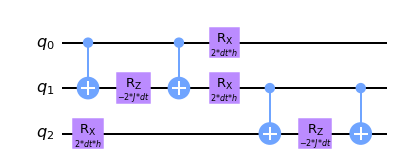

In [6]:
# Latex-like symbols only supported by current versions of my PR 6899 (in template optimization)
JJ = Parameter('$J$') # exchange coupling strength
hh = Parameter('$h$') # transverse magnetic field
dt = Parameter('$dt$') # Trotter step size
TT = Parameter('$T$') # total time

# use non-Latex-like Parameters when going off older commit mods-for-mzm-phase
# JJ = Parameter('J') # exchange coupling strength
# hh = Parameter('h') # transverse magnetic field
# dt = Parameter('dt') # Trotter step size
# TT = Parameter('T') # total time

qc = QuantumCircuit(3)
qc.cx(0, 1)
qc.rz(-2*JJ*dt, 1)
qc.cx(0, 1)
qc.rx(2*hh*dt, [0, 1, 2])
qc.cx(1, 2)
qc.rz(-2*JJ*dt, 2)
qc.cx(1, 2)
qc.draw(output='mpl')

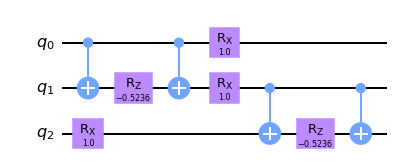

In [7]:
param_bind = {JJ: 0.5236, hh: 1, dt: 0.5}
qc.bind_parameters(param_bind).draw(output='mpl')

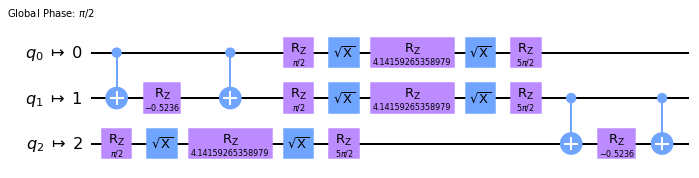

In [8]:
qc_t = transpile(qc.bind_parameters(param_bind), backend)
qc_t.draw(output='mpl', idle_wires=False)

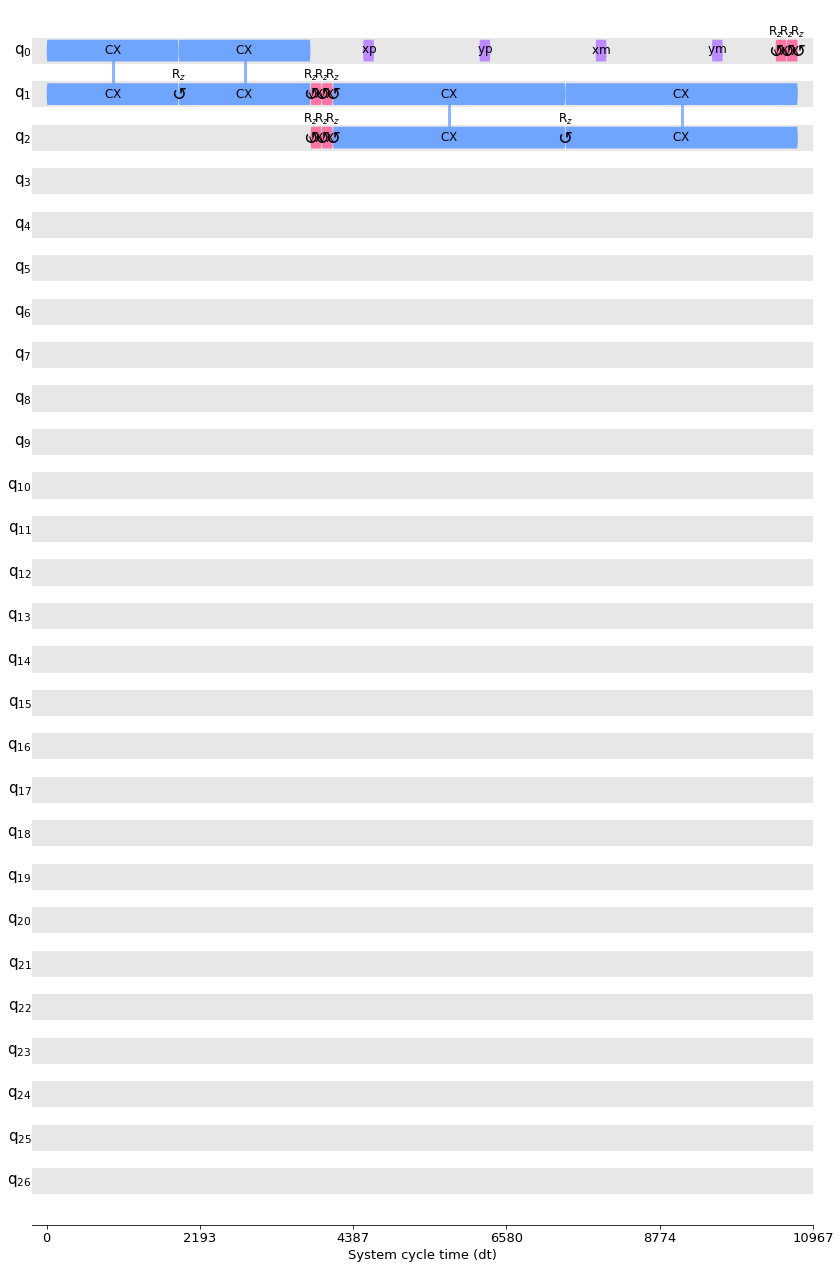

In [14]:
from qiskit_research.utils.dynamical_decoupling import add_dd_sequence
my_dd_circ = add_dd_sequence(qc_t, backend, 'XY4pm', 'alap')
timeline_drawer(my_dd_circ)

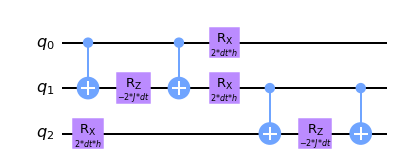

In [10]:
qc.draw(output='mpl')

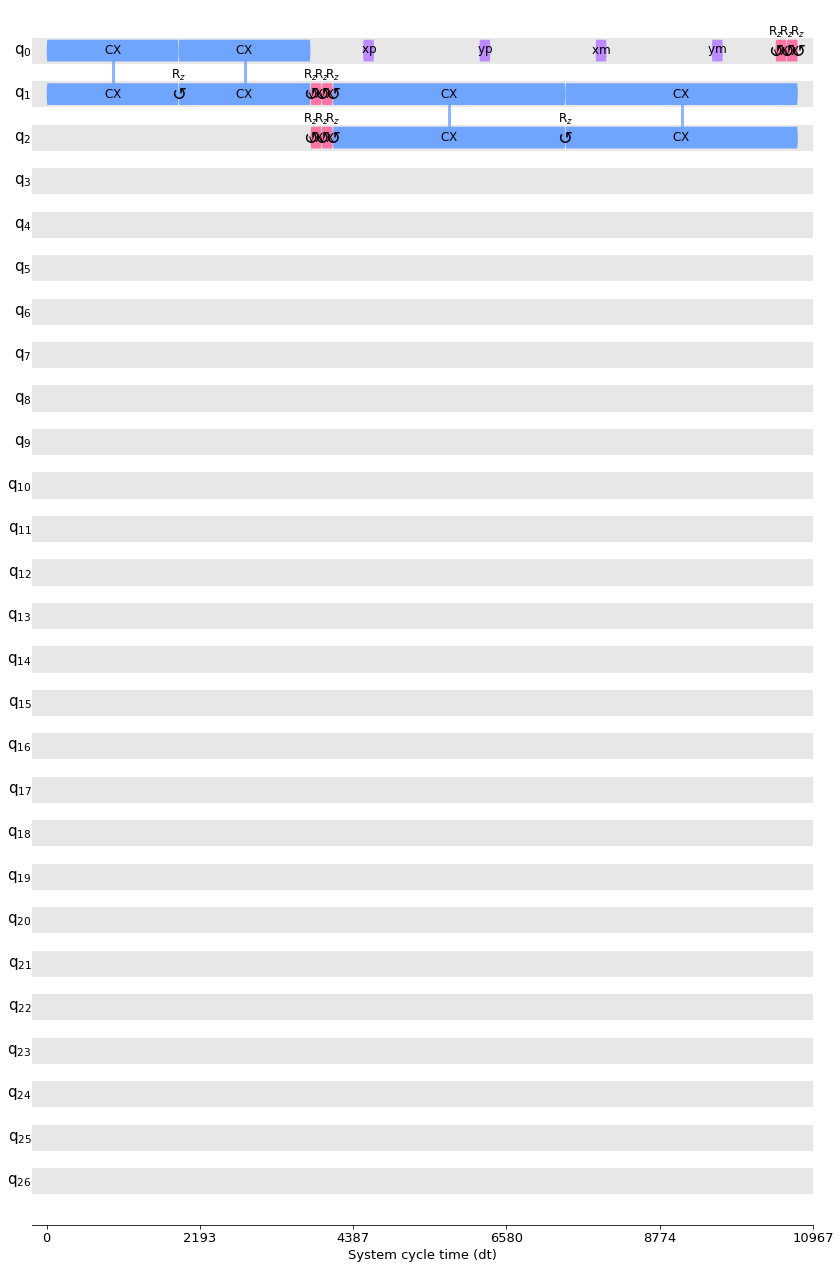

In [16]:
from qiskit_research.utils.dynamical_decoupling import add_dd_calibrations
timeline_drawer(add_dd_calibrations(qc_t, backend, 'XY4pm', sched_method='alap'))

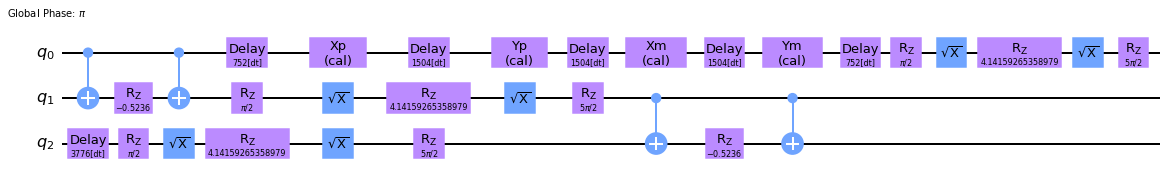

In [18]:
add_dd_calibrations(qc_t, backend, 'XY4pm', sched_method='alap').draw(output='mpl', idle_wires=False)